Text(0, 0.5, 'Frequency')

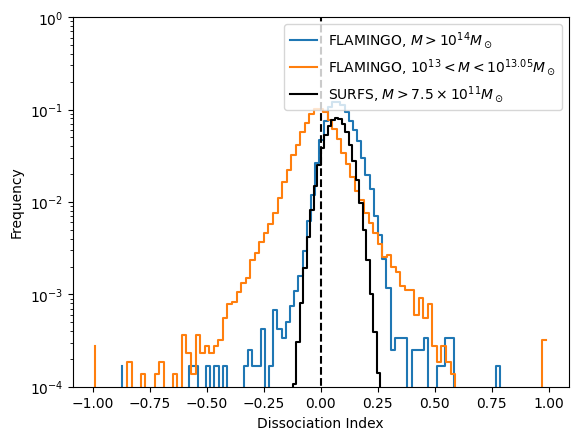

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
f=h5py.File("/Users/24756376/data/Flamingo/L1000N0900/S14.hdf5",'r')
S14=np.array(f['S'])
bin14=np.array(f['bin'])
f.close()
f=h5py.File("/Users/24756376/data/Flamingo/L1000N0900/S13.hdf5",'r')
S13=np.array(f['S'])
bin13=np.array(f['bin'])
f.close()
#print(bin13)
fig=plt.figure()    
ax=fig.add_subplot(111)
bins=np.linspace(-0.2,0.4,40)
ax.plot(bin14,S14,label=r"FLAMINGO, $M>10^{14}M_\odot$",drawstyle='steps')
ax.plot(bin13,S13,label=r"FLAMINGO, $10^{13}<M<10^{13.05}M_\odot$",drawstyle='steps')
ax.plot(bins,0.08190315*np.exp(-(bins-0.078895)**2/2/0.0512119**2),label=r"SURFS, $M>7.5\times 10^{11}M_\odot$",color='k',drawstyle='steps')
ax.legend()

ax.set_yscale("log")
ax.set_xlabel("Dissociation Index")
ax.vlines(0,10**-5,1000,linestyle='--',color='k')
ax.set_ybound(10**-4,1)
#ax.set_xbound(-0.5,0.5)
ax.set_ylabel("Frequency")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import functions as fn
from scipy.stats import spearmanr,pearsonr
f=h5py.File("/Users/24756376/data/Flamingo/L1000N0900/S_compare.hdf5",'r')
S_c=np.array(f["S_central"])
S_m=np.array(f["S_central_sat"])
#S_mms=np.array(f["S_mms"])
S_200=np.array(f["S_r200"])
S_100=np.array(f["S_r100"])
#S_50=np.array(f["S_r50"])
#S_rm50=np.array(f["S_r50_m"])
S_rm=np.array(f["S_mem_r100"])
S_c_ub=np.array(f["S_cen_unbound"])
R_sat=np.array(f["R_sat_100"])
R_mms=np.array(f["R_mms"])
S_sat=np.array(f["S_sat"])
f.close()

index_c=np.argpartition(S_c, -10)[-10:]
index_100=np.argpartition(S_100, -10)[-10:]
index_m=np.argpartition(S_m, -10)[-10:]
print(S_100[66],S_c_ub[66],R_mms[66])
#index_100=np.argwhere(S_c>S_m)
f=h5py.File("/Users/24756376/data/Flamingo/L1000N0900/S_dist.hdf5",'r')
S_100_all=np.array(f["S_r100"])
S_200_all=np.array(f["S_r200"])
S_50_all=np.array(f["S_r50"])
S_2_all=np.array(f["S_r2"])
S_4_all=np.array(f["S_r4"])
S_6_all=np.array(f["S_r6"])
f.close()
print(R_mms[66],R_mms[82])
'''


fig = plt.figure()
ax=plt.subplot(1,1,1)
#ax.scatter(S_c,S_m,color='r',s=0.2,alpha=0.1,label="central_sat")
#ax.scatter(S_c,S_r,color='b',s=0.2,alpha=0.1,label="r200")
#ax.scatter(S_c,S_r2,color='k',s=0.3,alpha=0.3,label="2r200")
ax.scatter(S_r[5000:8000],S_rm[5000:8000],s=0.3,alpha=0.3)#,label="r200")
ax.plot(np.linspace(-0.1,0.3,20),np.linspace(-0.1,0.3,20))
#ax.hlines(1,-1,1)
ax.legend()
ax.set_xlabel("S_r")
ax.set_ylabel("S_r_mem")

#ax.set_yscale("log")
#fig.savefig("/Users/24756376/plot/Flamingo/L1000N0900/Dissociation_compare_mem_2r200.png")
'''

103
0.051937707852717646 -0.056365738791354064 0.17438879750261801
0.17438879750261801 0.07600374942460948


'\n\n\nfig = plt.figure()\nax=plt.subplot(1,1,1)\n#ax.scatter(S_c,S_m,color=\'r\',s=0.2,alpha=0.1,label="central_sat")\n#ax.scatter(S_c,S_r,color=\'b\',s=0.2,alpha=0.1,label="r200")\n#ax.scatter(S_c,S_r2,color=\'k\',s=0.3,alpha=0.3,label="2r200")\nax.scatter(S_r[5000:8000],S_rm[5000:8000],s=0.3,alpha=0.3)#,label="r200")\nax.plot(np.linspace(-0.1,0.3,20),np.linspace(-0.1,0.3,20))\n#ax.hlines(1,-1,1)\nax.legend()\nax.set_xlabel("S_r")\nax.set_ylabel("S_r_mem")\n\n#ax.set_yscale("log")\n#fig.savefig("/Users/24756376/plot/Flamingo/L1000N0900/Dissociation_compare_mem_2r200.png")\n'

/opt/anaconda3/envs/myenv/lib/python3.13/site-packages/scipy/stats/_stats_py.py:4776: RuntimeWarning: overflow encountered in vecdot
  r = xp.vecdot(xm / normxm, ym / normym, axis=axis)


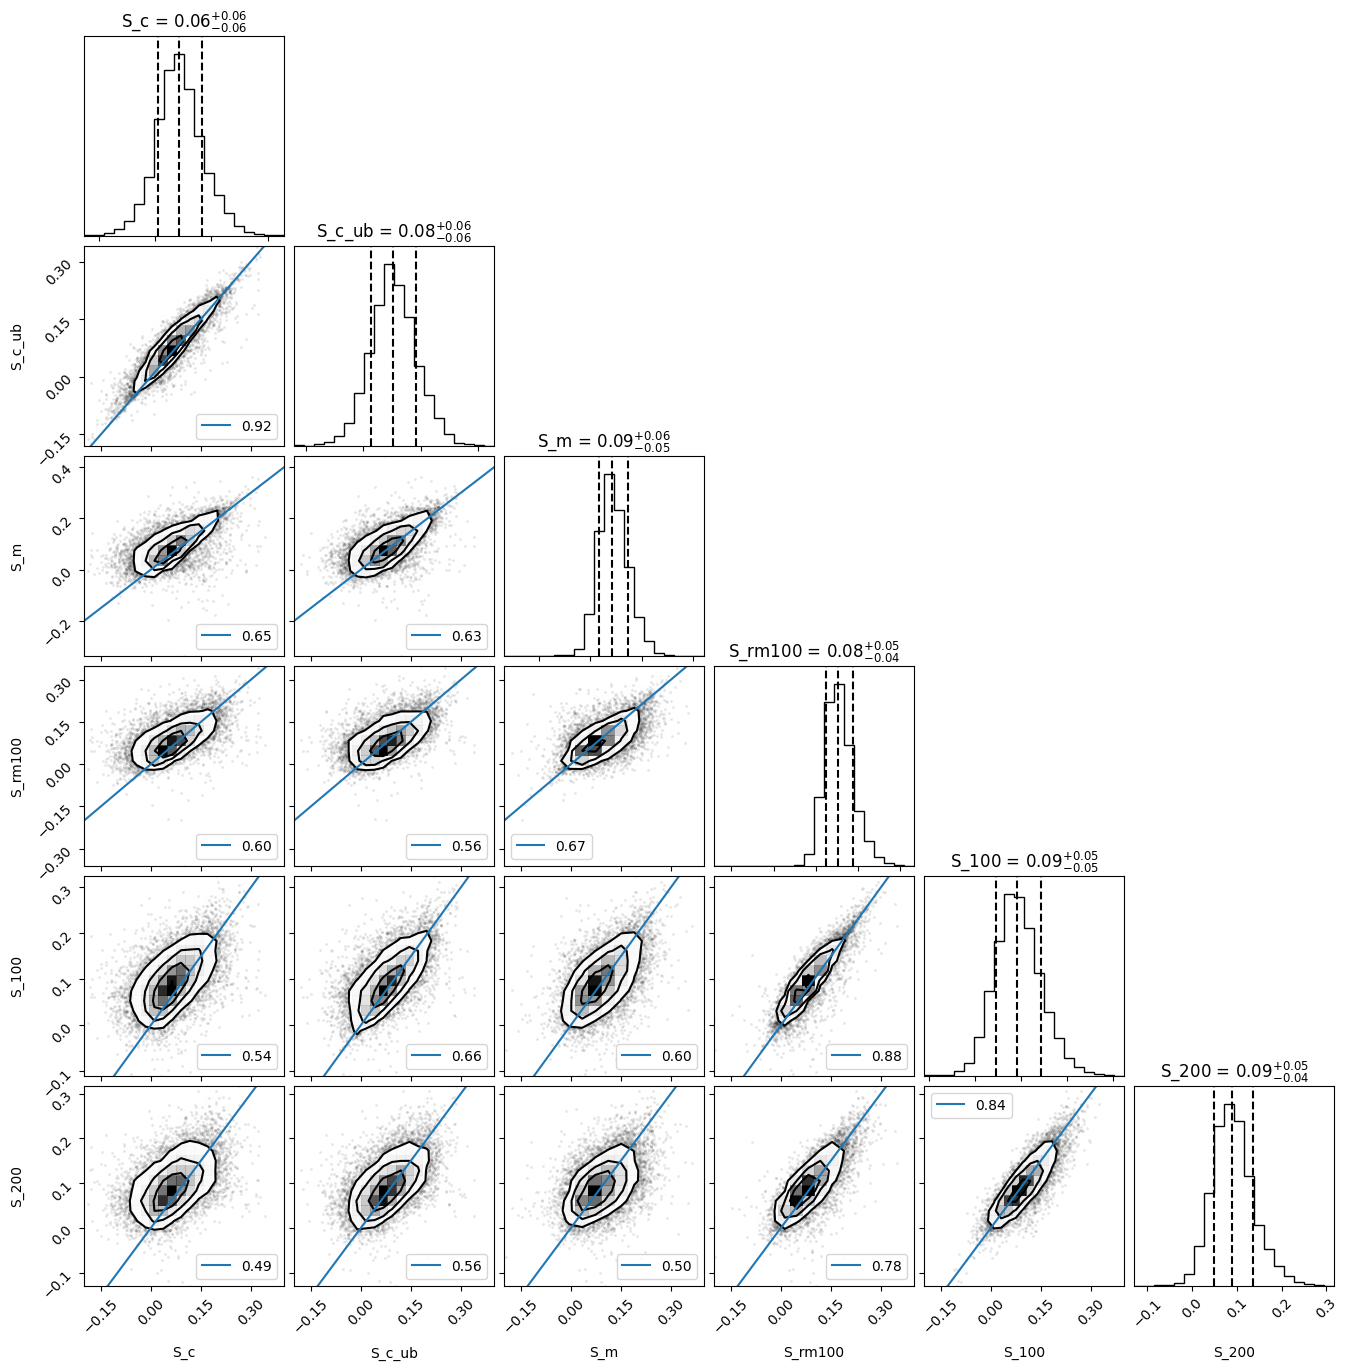

In [5]:
import corner
import numpy as np

    # Generate some dummy MCMC samples (replace with your actual samples)

samples = (np.array([S_c,S_c_ub,S_m,S_rm,S_100,S_200]).T)

#print(samples)
    # Create the corner plot
fig = corner.corner(samples, labels=["S_c","S_c_ub", "S_m","S_rm100", "S_100","S_200"],
                         # Optional: true values
                        quantiles=[0.16, 0.5, 0.84], show_titles=True)
axes = np.array(fig.axes).reshape((6,6))
for yi in range(6):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.set_xbound(-0.2,0.4)
        r,p=pearsonr(samples[:,xi],samples[:,yi])
        ax.plot(np.linspace(-1,0.5,20),np.linspace(-1,0.5,20),label=f"{r:.2f}")
#        ax.scatter(samples[:,xi][[1815,836,9065]],samples[:,yi][[1815,836,9065]],s=0.5,color='r')
#        ax.scatter(samples[:,xi][[5673,6402,9249,4356,2113]],samples[:,yi][[5673,6402,9249,4356,2113]],s=0.5,color='g')
#        ax.scatter(samples[:,xi][index_100],samples[:,yi][index_100],s=0.3,alpha=0.5,color='r')
        ax.legend()

In [2]:
import corner
import numpy as np

    # Generate some dummy MCMC samples (replace with your actual samples)

samples = np.array([S_c,S_c_ub,S_m,S_rm,S_100,S_200]).T[0:659]
labels=["S_c","S_c_ub", "S_m","S_rm100", "S_100","S_200"]
#print(samples)
    # Create the corner plot
fig = plt.figure(figsize=(12,12))
gs = fig.add_gridspec(6,6, hspace=0, wspace=0)
axes = gs.subplots(sharex='col', sharey='row')

print(np.argwhere(((samples[:,4]>0.25))))
#print(np.argwhere((samples[:,1]-samples[:,4]<-0.15)))#sat larger than cen????
print(samples[:,1][141],samples[:,4][141])
for yi in range(6):
    for xi in range(yi):
        ax = axes[yi,xi]
      
        ax.scatter(samples[:,xi],samples[:,yi],color='red',s=0.5,alpha=1)
#        ax.scatter(samples[:,xi][samples[:,4]>0.15],samples[:,yi][samples[:,4]>0.15],color='blue',s=0.5,alpha=0.5)
      
        ax.set_xlabel(labels[xi])
        if xi==0:
          ax.set_ylabel(labels[yi])
        r,p=pearsonr(samples[:,xi],samples[:,yi])
        ax.plot(np.linspace(-1,0.5,20),np.linspace(-1,0.5,20),linestyle='--',linewidth=0.5,color='k')
        ax.set_xbound(-0.2,0.4)
        ax.set_ybound(-0.2,0.4)
#        ax.scatter(samples[:,xi][[1815,836,9065]],samples[:,yi][[1815,836,9065]],s=0.5,color='r')
#        ax.scatter(samples[:,xi][[5673,6402,9249,4356,2113]],samples[:,yi][[5673,6402,9249,4356,2113]],s=0.5,color='g')
#        ax.scatter(samples[:,xi][index_100],samples[:,yi][index_100],s=0.3,alpha=0.5,color='r')
        ax.legend()

NameError: name 'S_c' is not defined

2.94921875


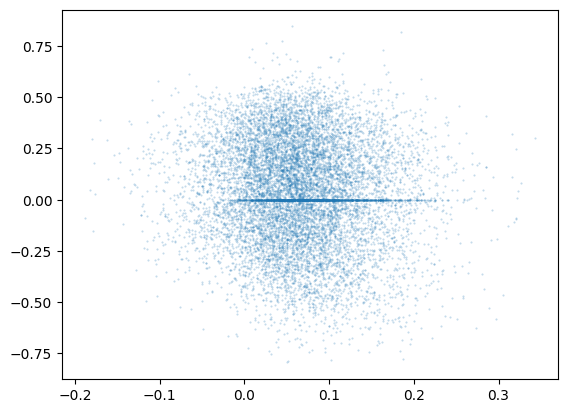

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
f=h5py.File("/Users/24756376/data/Flamingo/L1000N0900/halos_ranked.hdf5",'r')
c=np.array(f["c200"])
r200=np.array(f["r200"])
r100=np.array(f["r100"])
r50=np.array(f["r50"])
mass=np.array(f['mass'])[r200>0]
r200=r200[r200!=0]
r100=r100[r100!=0]
r50=r50[r50!=0]
c=c[c!=0]
f.close()
print(r100[66])
fig = plt.figure()
ax=plt.subplot(1,1,1)
ax.scatter(S_c,S_sat,s=0.2,alpha=0.3)
#ax.scatter(r200,S_200_all,s=0.2,alpha=0.3)
#ax.scatter(R_mms,S_100-S_c_ub,s=0.2,alpha=0.3)
#ax.scatter(r200,S_50_all,color="red",s=0.2,alpha=0.2)
#ax.scatter(r200,S_2_all,s=0.2,alpha=0.3)
#ax.scatter(r200,S_4_all,s=0.2,alpha=0.3)
#ax.scatter(r200,S_6_all,s=0.2,color="red",alpha=0.3)


#ax.set_xscale("log")


/opt/anaconda3/envs/myenv/lib/python3.13/site-packages/scipy/stats/_stats_py.py:4776: RuntimeWarning: overflow encountered in vecdot
  r = xp.vecdot(xm / normxm, ym / normym, axis=axis)


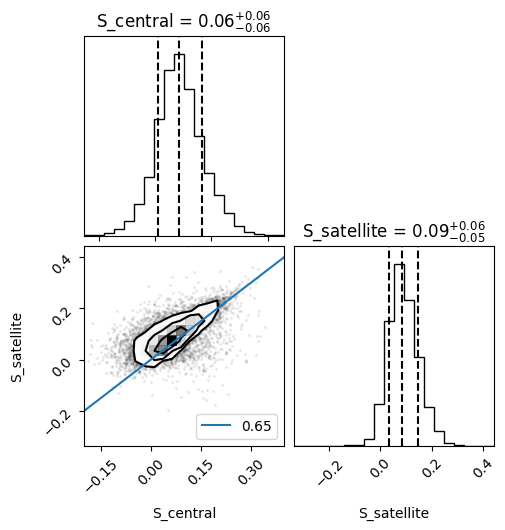

In [20]:
samples = np.array([S_c,S_m]).T
labels=["S_central","S_satellite"]
#print(samples)
    # Create the corner plot
fig = corner.corner(samples, labels=labels,
                         # Optional: true values
                        quantiles=[0.16, 0.5, 0.84], show_titles=True)
axes = np.array(fig.axes).reshape((2,2))
for yi in range(2):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.set_xbound(-0.2,0.4)
        r,p=pearsonr(samples[:,xi],samples[:,yi])
        ax.plot(np.linspace(-1,0.5,20),np.linspace(-1,0.5,20),label=f"{r:.2f}")
#        ax.scatter(samples[:,xi][[1815,836,9065]],samples[:,yi][[1815,836,9065]],s=0.5,color='r')
#        ax.scatter(samples[:,xi][[5673,6402,9249,4356,2113]],samples[:,yi][[5673,6402,9249,4356,2113]],s=0.5,color='g')
#        ax.scatter(samples[:,xi][index_100],samples[:,yi][index_100],s=0.3,alpha=0.5,color='r')
        ax.legend()

/opt/anaconda3/envs/myenv/lib/python3.13/site-packages/scipy/stats/_stats_py.py:4776: RuntimeWarning: overflow encountered in vecdot
  r = xp.vecdot(xm / normxm, ym / normym, axis=axis)


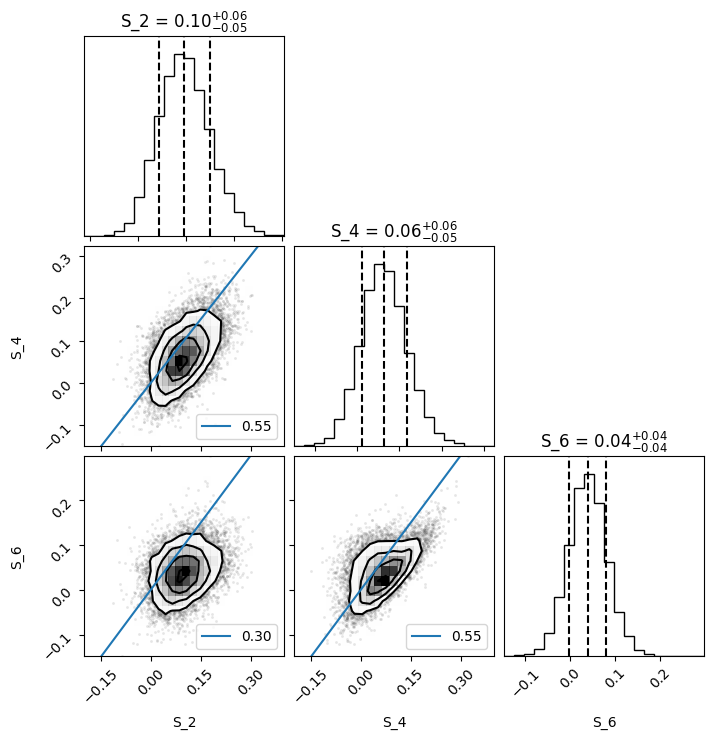

In [8]:
samples = np.array([S_2_all,S_4_all,S_6_all]).T
labels=["S_2","S_4", "S_6"]
#print(samples)
    # Create the corner plot
fig = corner.corner(samples, labels=labels,
                         # Optional: true values
                        quantiles=[0.16, 0.5, 0.84], show_titles=True)
axes = np.array(fig.axes).reshape((3,3))
for yi in range(3):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.set_xbound(-0.2,0.4)
        r,p=pearsonr(samples[:,xi],samples[:,yi])
        ax.plot(np.linspace(-1,0.5,20),np.linspace(-1,0.5,20),label=f"{r:.2f}")
#        ax.scatter(samples[:,xi][[1815,836,9065]],samples[:,yi][[1815,836,9065]],s=0.5,color='r')
#        ax.scatter(samples[:,xi][[5673,6402,9249,4356,2113]],samples[:,yi][[5673,6402,9249,4356,2113]],s=0.5,color='g')
#        ax.scatter(samples[:,xi][index_100],samples[:,yi][index_100],s=0.3,alpha=0.5,color='r')
        ax.legend()

[]


/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_9445/1186981593.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


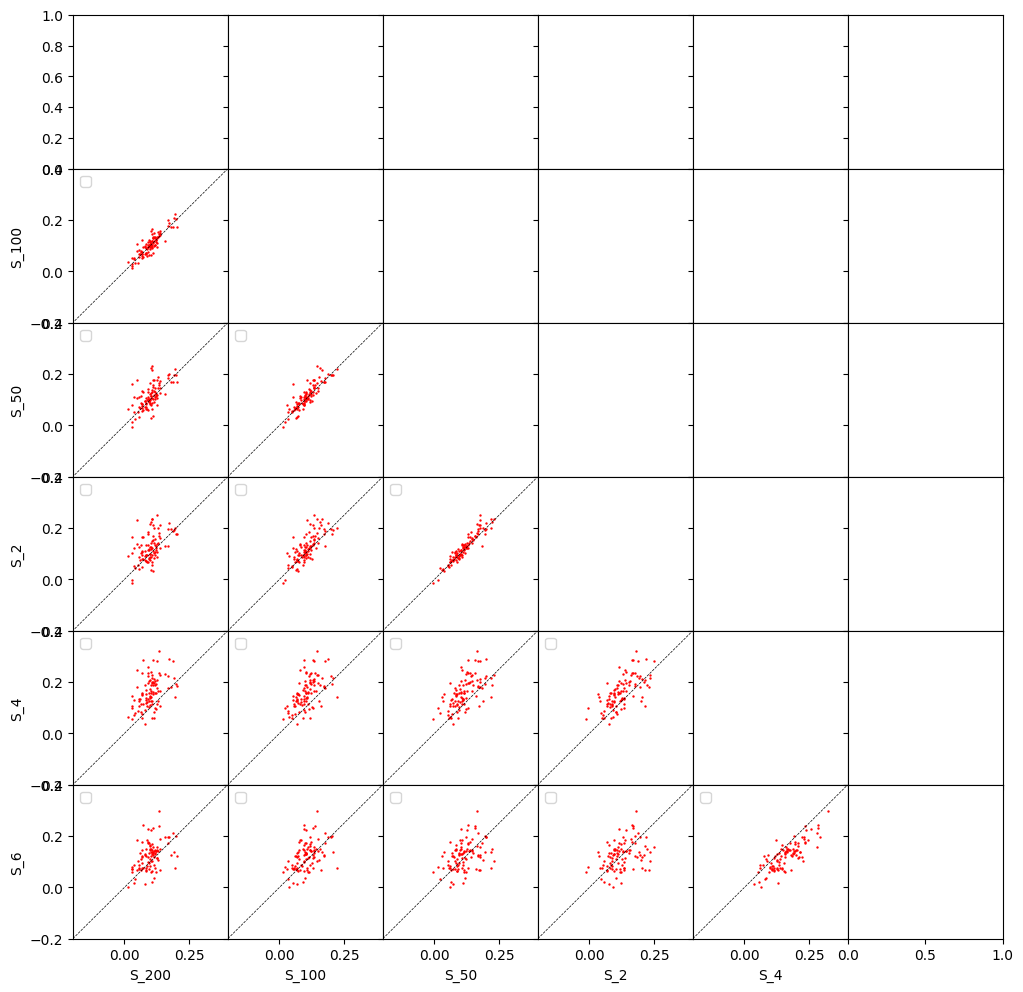

In [30]:
samples = np.array([S_200_all,S_100_all,S_50_all,S_2_all,S_4_all,S_6_all]).T[0:100]
labels=["S_200","S_100", "S_50","S_2", "S_4","S_6"]
#print(samples)
    # Create the corner plot
fig = plt.figure(figsize=(12,12))
gs = fig.add_gridspec(6,6, hspace=0, wspace=0)
axes = gs.subplots(sharex='col', sharey='row')

#print(np.argwhere((samples[:,1]-samples[:,4]<00.1)+(samples[:,1]-samples[:,4]<-0.1)))
print(np.argwhere((samples[:,1]<0)*(samples[:,4]<0.05)))#sat larger than cen????
#print(np.argwhere((samples[:,1]>0.2)*(samples[:,4]>0.15)))
for yi in range(6):
    for xi in range(yi):
        ax = axes[yi,xi]
      
        ax.scatter(samples[:,xi],samples[:,yi],color='red',s=0.5,alpha=1)
#        ax.scatter(samples[:,xi][samples[:,4]>0.15],samples[:,yi][samples[:,4]>0.15],color='blue',s=0.5,alpha=0.5)
      
        ax.set_xlabel(labels[xi])
        if xi==0:
          ax.set_ylabel(labels[yi])
        r,p=pearsonr(samples[:,xi],samples[:,yi])
        ax.plot(np.linspace(-1,0.5,20),np.linspace(-1,0.5,20),linestyle='--',linewidth=0.5,color='k')
        ax.set_xbound(-0.2,0.4)
        ax.set_ybound(-0.2,0.4)
#        ax.scatter(samples[:,xi][[1815,836,9065]],samples[:,yi][[1815,836,9065]],s=0.5,color='r')
#        ax.scatter(samples[:,xi][[5673,6402,9249,4356,2113]],samples[:,yi][[5673,6402,9249,4356,2113]],s=0.5,color='g')
#        ax.scatter(samples[:,xi][index_100],samples[:,yi][index_100],s=0.3,alpha=0.5,color='r')
        ax.legend()

In [3]:
path="/Users/24756376/data/Flamingo/L1000N0900/"
f=h5py.File(path+'S_compare_new.hdf5','r')
S_n=np.array(f["S_distance_wo_nei"])#no near halos
S_cen=np.array(f["S_distance_cen"])#just central cluster
S=np.array(f["S_distance"])#everything
S_nosat=np.array(f["S_distance_wo_satellite"])#central halo +unbound(without satellite)
f.close()
bins=np.linspace(0.4,2,15)

f=h5py.File(path+'S_dist.hdf5','r')
peak=np.array(f["bar_peak"])



f.close()




7793


/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_16116/1410200026.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


Text(0, 0.5, 'S')

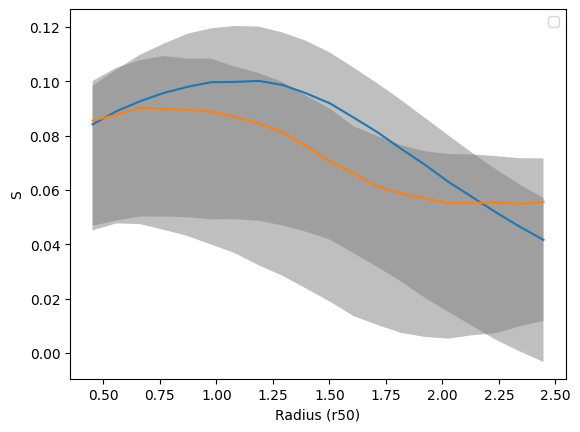

In [ ]:
fig = plt.figure()
ax=plt.subplot(1,1,1)
bins=np.linspace(0.2,2.5,21)
bin=(bins[1:]+bins[:-1])/2
print(len(peak[peak>0]))

ax.legend()
per=np.percentile(S[peak>0], [16, 50, 64], axis=0)
ax.plot(bin, per[1], label='witghout neighbor')
ax.fill_between(bin, per[0],per[2], facecolor='gray', alpha=.5, label=r"$1-\sigma$")
per=np.percentile(S[peak==0], [16, 50, 64], axis=0)
ax.plot(bin, per[1], label='with neighbor')
ax.fill_between(bin, per[0],per[2], facecolor='gray', alpha=.5, label=r"$1-\sigma$")
ax.set_xlabel("Radius (r50)")
ax.set_ylabel("S")

7793


/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_16116/1557716750.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


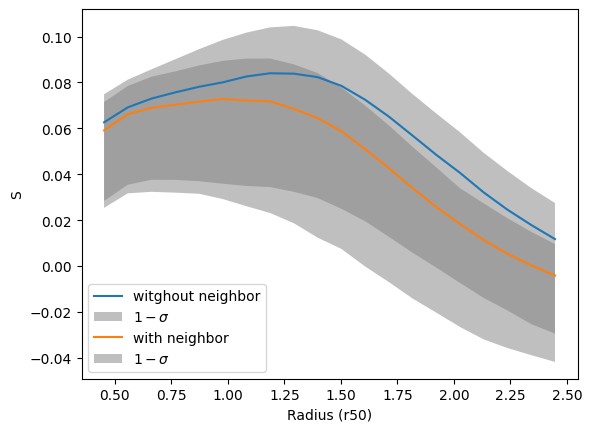

In [6]:
fig = plt.figure()
ax=plt.subplot(1,1,1)
bins=np.linspace(0.4,2.5,21)
bin=(bins[1:]+bins[:-1])/2
print(len(peak[peak>0]))

ax.legend()
per=np.percentile(S_n[peak>0], [16, 50, 64], axis=0)
ax.plot(bin, per[1], label='witghout neighbor')
ax.fill_between(bin, per[0],per[2], facecolor='gray', alpha=.5, label=r"$1-\sigma$")
per=np.percentile(S_n[peak==0], [16, 50, 64], axis=0)
ax.plot(bin, per[1], label='with neighbor')
ax.fill_between(bin, per[0],per[2], facecolor='gray', alpha=.5, label=r"$1-\sigma$")
ax.set_xlabel("Radius (r50)")
ax.set_ylabel("S")
ax.legend()

7793


/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_21792/3481993032.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


Text(0, 0.5, 'S')

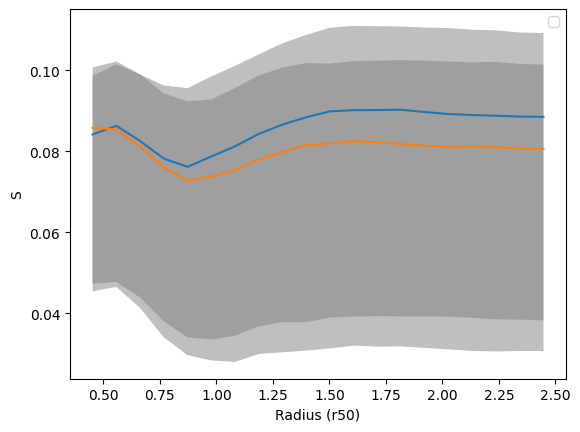

In [7]:
fig = plt.figure()
ax=plt.subplot(1,1,1)
bins=np.linspace(0.4,2.5,21)
bin=(bins[1:]+bins[:-1])/2
print(len(peak[peak>0]))

ax.legend()
per=np.percentile(S_cen[peak>0], [16, 50, 64], axis=0)
ax.plot(bin, per[1], label='mean')
ax.fill_between(bin, per[0],per[2], facecolor='gray', alpha=.5, label=r"$1-\sigma$")
per=np.percentile(S_cen[peak==0], [16, 50, 64], axis=0)
ax.plot(bin, per[1], label='mean')
ax.fill_between(bin, per[0],per[2], facecolor='gray', alpha=.5, label=r"$1-\sigma$")
ax.set_xlabel("Radius (r50)")
ax.set_ylabel("S")

639


/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_16116/405014241.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


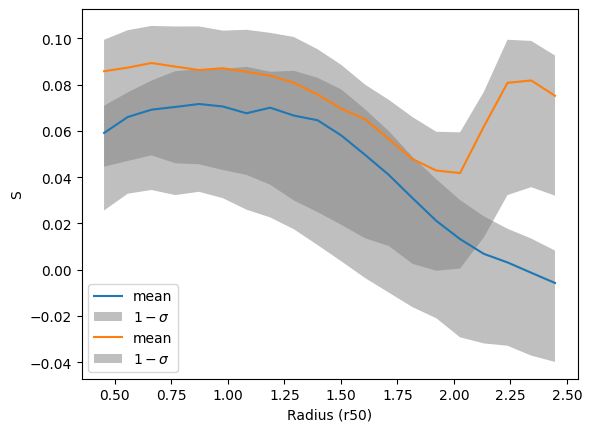

In [21]:
f=h5py.File("/Users/24756376/data/Flamingo/L1000N0900/neighbour.hdf5", 'r')
i=np.array(f["index"])
d=np.array(f["distance"])
f.close()
f=h5py.File("/Users/24756376/data/Flamingo/L1000N0900/halos_ranked.hdf5", 'r')
r200=np.array(f['r200'])

r50=np.array(f['r50'])
id=np.array(f['id'])
f.close()
r200=r200[r200!=0]
r50=r50[r50!=0]
d=d/r50*r200
fig = plt.figure()
ax=plt.subplot(1,1,1)
bins=np.linspace(0.4,2.5,21)
bin=(bins[1:]+bins[:-1])/2


ax.legend()
args=np.concatenate(np.argwhere((d>2)*(d<2.2)))
print(len(args))
per=np.percentile(S_n[args], [16, 50, 64], axis=0)
ax.plot(bin, per[1], label='mean')
ax.fill_between(bin, per[0],per[2], facecolor='gray', alpha=.5, label=r"$1-\sigma$")


per=np.percentile(S[args], [16, 50, 64], axis=0)
ax.plot(bin, per[1], label='mean')
ax.fill_between(bin, per[0],per[2], facecolor='gray', alpha=.5, label=r"$1-\sigma$")
ax.set_xlabel("Radius (r50)")
ax.set_ylabel("S")
ax.legend()
#W~0.3r50*2


7793


/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_28378/1410100595.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


Text(0, 0.5, 'S')

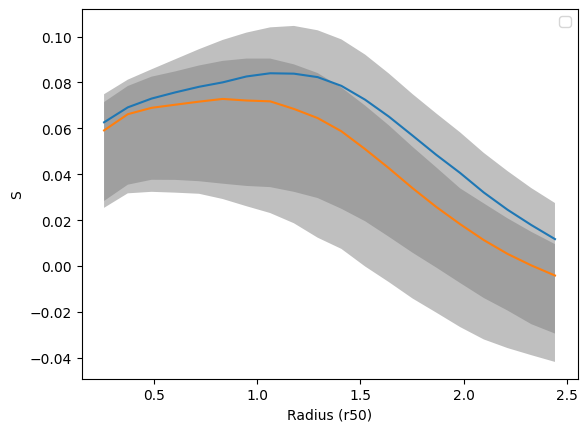

In [6]:
fig = plt.figure()
ax=plt.subplot(1,1,1)
bins=np.linspace(0.2,2.5,21)
bin=(bins[1:]+bins[:-1])/2
print(len(peak[peak>0]))

ax.legend()
per=np.percentile(S_nosat[peak>0], [16, 50, 64], axis=0)
ax.plot(bin, per[1], label='mean')
ax.fill_between(bin, per[0],per[2], facecolor='gray', alpha=.5, label=r"$1-\sigma$")
per=np.percentile(S_nosat[peak==0], [16, 50, 64], axis=0)
ax.plot(bin, per[1], label='mean')
ax.fill_between(bin, per[0],per[2], facecolor='gray', alpha=.5, label=r"$1-\sigma$")
ax.set_xlabel("Radius (r50)")
ax.set_ylabel("S")

7793


/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_16116/4232663791.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


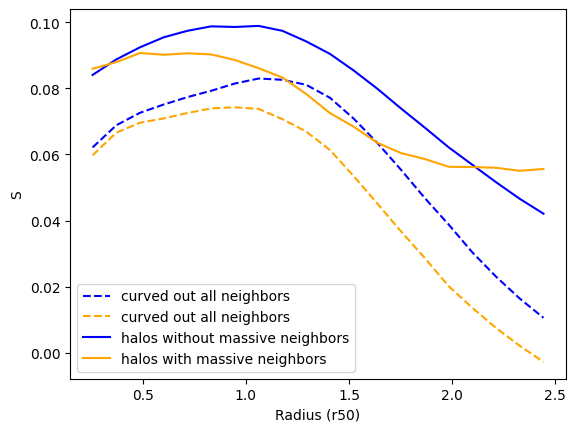

In [18]:
fig = plt.figure()
ax=plt.subplot(1,1,1)
bins=np.linspace(0.2,2.5,21)
bin=(bins[1:]+bins[:-1])/2
print(len(peak[peak>0]))

ax.legend()
per=np.percentile(S_n[d==0], 50, axis=0)
ax.plot(bin, per, color="blue",linestyle="dashed",label='curved out all neighbors')

per=np.percentile(S_n[d>0], 50, axis=0)
ax.plot(bin, per,color="orange",linestyle="dashed", label='curved out all neighbors')
per=np.percentile(S[d==0], 50, axis=0)
ax.plot(bin, per, color="blue",label='halos without massive neighbors')
per=np.percentile(S[d>0], 50, axis=0)
ax.plot(bin, per, color="orange",label='halos with massive neighbors')
ax.set_xlabel("Radius (r50)")
ax.set_ylabel("S")
ax.legend()